In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

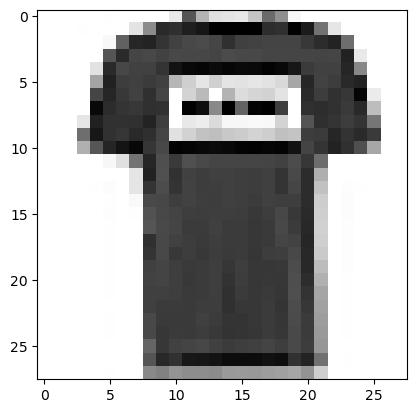

In [6]:
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [7]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [8]:
len(x_train[0][0])

28

In [9]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
y_train_mt = y_train
y_train = keras.utils.to_categorical(y_train, num_classes)

In [11]:
y_test_mt = y_test
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25


422/422 [==============================] - 20s 43ms/step - loss: 0.7007 - accuracy: 0.7486 - val_loss: 0.4488 - val_accuracy: 0.8440
Epoch 2/25
422/422 [==============================] - 17s 40ms/step - loss: 0.4552 - accuracy: 0.8347 - val_loss: 0.3859 - val_accuracy: 0.8652
Epoch 3/25
422/422 [==============================] - 17s 41ms/step - loss: 0.4071 - accuracy: 0.8541 - val_loss: 0.3609 - val_accuracy: 0.8715
Epoch 4/25
422/422 [==============================] - 17s 40ms/step - loss: 0.3752 - accuracy: 0.8657 - val_loss: 0.3281 - val_accuracy: 0.8828
Epoch 5/25
422/422 [==============================] - 17s 40ms/step - loss: 0.3542 - accuracy: 0.8722 - val_loss: 0.3164 - val_accuracy: 0.8868
Epoch 6/25
422/422 [==============================] - 17s 41ms/step - loss: 0.3345 - accuracy: 0.8799 - val_loss: 0.3032 - val_accuracy: 0.8890
Epoch 7/25
422/422 [==============================] - 18s 42ms/step - loss: 0.3224 - accuracy: 0.8848 - val_loss: 0.2884 - val_accurac

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25878939032554626
Test accuracy: 0.9053000211715698


In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
y_probs_test = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [19]:
y_pred_test = y_probs_test.argmax(axis=1)

In [20]:
y_pred_test.shape

(10000,)

In [21]:
y_probs_train = model.predict(x_train)

1875/1875 [==============================] - 16s 8ms/step


In [22]:
y_pred_train = y_probs_train.argmax(axis=1)

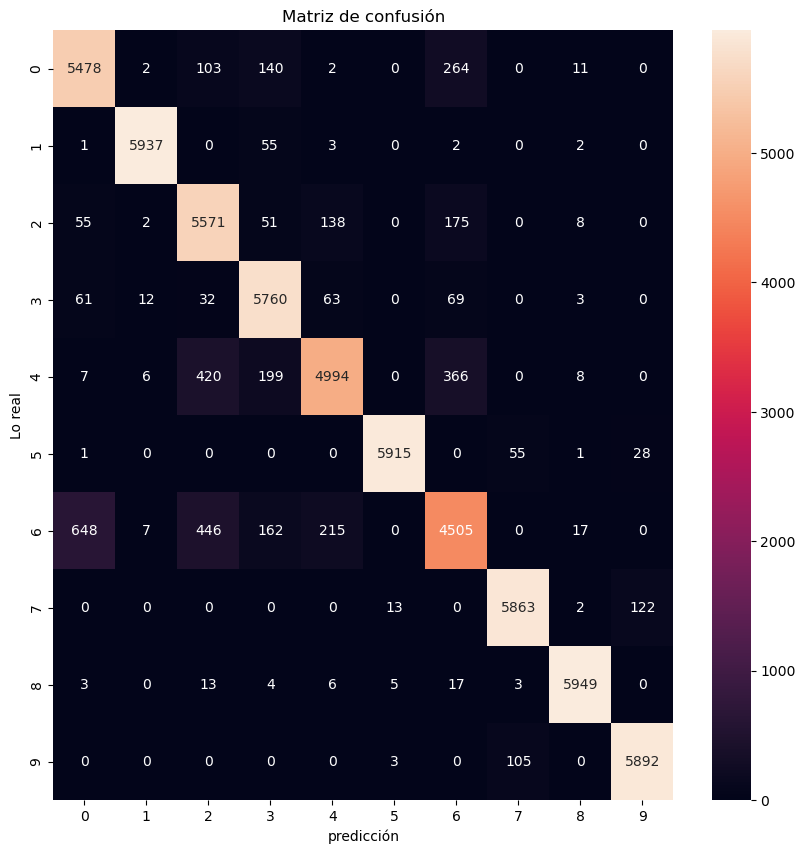

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6000
           1       1.00      0.99      0.99      6000
           2       0.85      0.93      0.89      6000
           3       0.90      0.96      0.93      6000
           4       0.92      0.83      0.87      6000
           5       1.00      0.99      0.99      6000
           6       0.83      0.75      0.79      6000
           7       0.97      0.98      0.98      6000
           8       0.99      0.99      0.99      6000
           9       0.98      0.98      0.98      6000

    accuracy                           0.93     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.93      0.93     60000



In [23]:
conf_matrix = confusion_matrix(y_train_mt, y_pred_train)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('Lo real')
plt.xlabel('predicción')
plt.show()
print (classification_report(y_train_mt, y_pred_train))

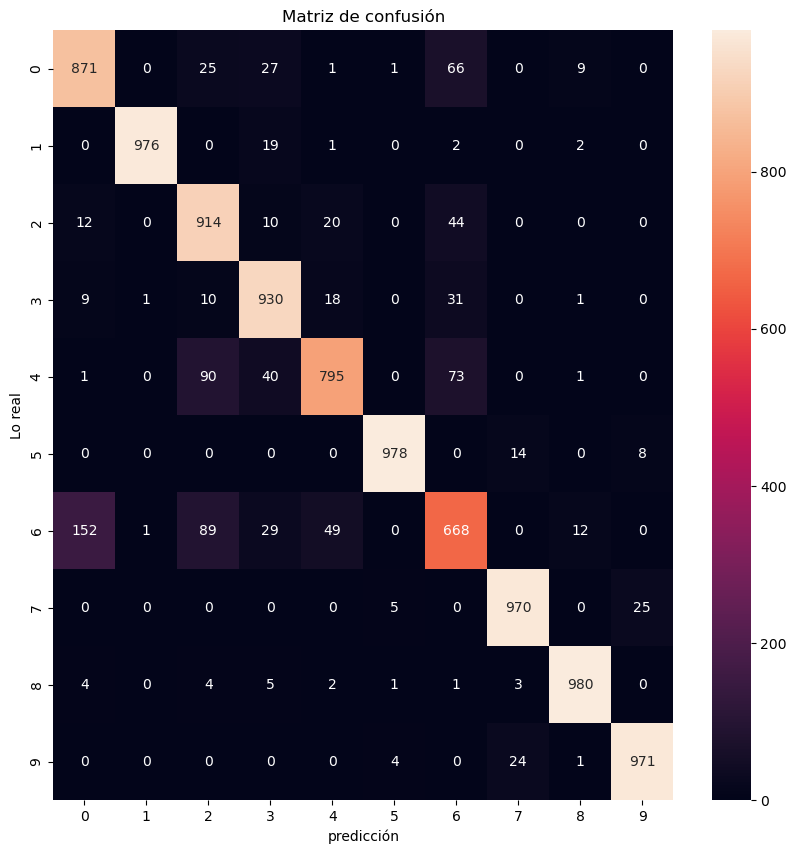

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.81      0.91      0.86      1000
           3       0.88      0.93      0.90      1000
           4       0.90      0.80      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.67      0.71      1000
           7       0.96      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [24]:
conf_matrix = confusion_matrix(y_test_mt, y_pred_test)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('Lo real')
plt.xlabel('predicción')
plt.show()
print (classification_report(y_test_mt, y_pred_test))